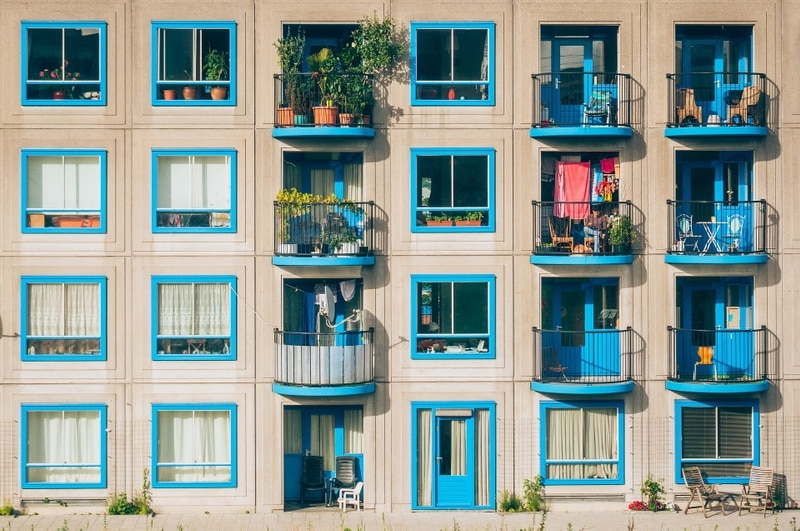

#  <center>🏘️ KNN unter Verwendung der euklidischen Distanz 📐  <center>

 ##### <center> <italic> Der k-nächste-Nachbarn-Algorithmus (KNN) ist ein einfacher, überwachter maschineller Lernalgorithmus, der verwendet werden kann, um sowohl Klassifizierungs- als auch Regressionsprobleme zu lösen. <center> 
    
   <center>  Es kann als eine überwachte Methode des maschinellen Lernens ausgedrückt werden, bei der die Klasse, in der sich der beispieldatenpunkt befindet (lernsatz) und der nächste Nachbar (Element) durch den K-Wert (Ähnlichkeit) bestimmt werden. <italic> <center> 

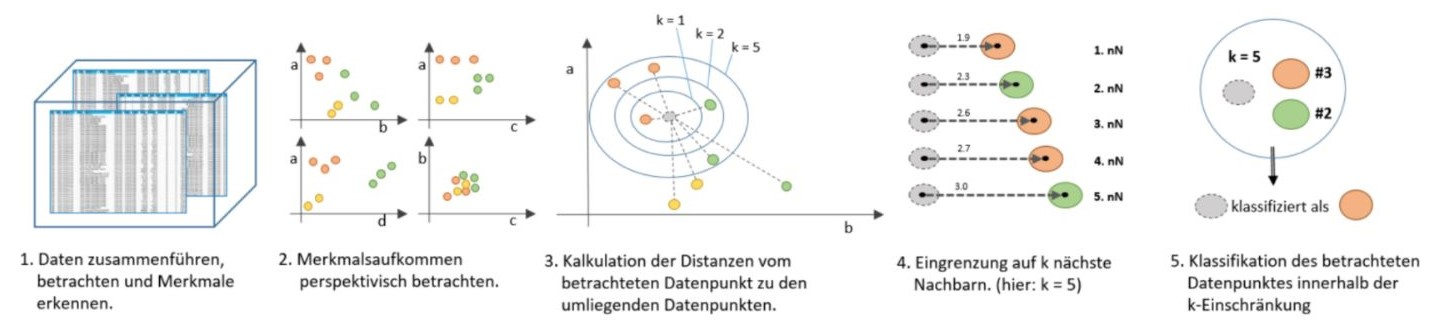

### 1. Importierung der Pakete

In [ ]:
import pandas as pd
# Pandas wird verwendet, um die Datendatei als Pandas-Datenrahmen zu laden und die Daten zu analysieren.

import numpy as np

import matplotlib.pyplot as plt
# Aus Matplotlib wird das Pyplot importiert, um Diagramme der Daten zu zeichnen
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
# Es standardisiert Merkmale, indem es den Mittelwert entfernt und auf Einheitsvarianz skaliert.

from sklearn.model_selection import train_test_split
# Wir können die Funktion train_test_split verwenden, um die Teilung vorzunehmen.

from sklearn.metrics import confusion_matrix
# Für Erstellung von Konfusionsmatrix verwenden wir das Modul scikit-learn Library metrics mit der Funktion confusion_matrix.

# K Klassifikation des Nächsten Nachbarn unter Verwendung der euklidischen Distanz

**Der euklidische Abstand**
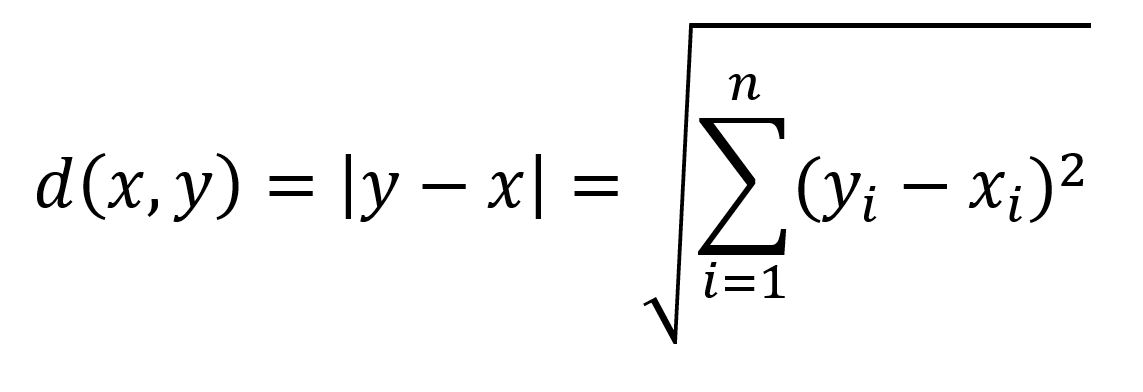

### Um den Abstand zwischen zwei Punkten (Euklidischen Distanz) zu berechnen

In [ ]:
def euklischen_distanz(punkt1,punkt2):
    distanz=0.0
    for i in range(len(punkt1)):
        distanz += (punkt1[i]-punkt2[i])**2
    return math.sqrt(distanz)

#### Oder

In [ ]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

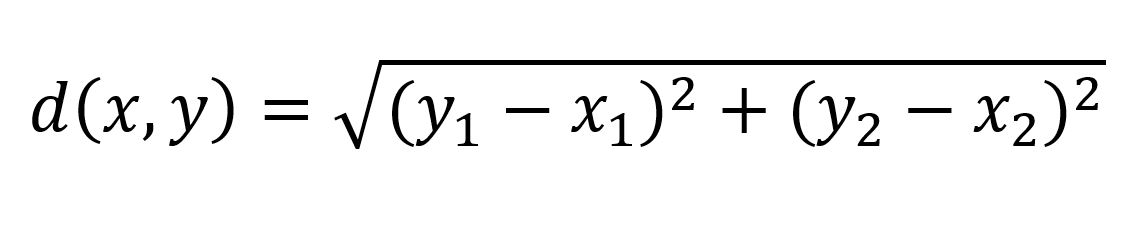

In [ ]:
def KnaechsteNachbarnAlgorithmus(train,test_obs,n):
    nachbarn_distanz= []
    for i in range(len(train)):
        l1=list(train.iloc[i,:])+[euklischen_distanz(train.iloc[i,:-1],test_obs)]
        nachbarn_distanz= nachbarn_distanz+[l1]
    nachbarn_distanz.sort(key=lambda x: x[-1])
    KnaechsteNachbarnAlgorithmus = [nachbarn_distanz[i] for i in range(0,n)]
    y_pred= [i[-2] for i in KnaechsteNachbarnAlgorithmus]
    return(int(max(y_pred,key=y_pred.count)))

Während der Zugriff auf die Daten unter Verwendung von Labels mit dem Befehl loc erfolgt, erfolgt der Zugriff auf die Daten mit den Zeilen- und Spaltenindexnummern im Befehl "iloc".

### Code zum Zurückgeben der Vorhersage (0 oder 1) für eine Testbeobachtung

In [ ]:
def Prognose(train,test_obs,n):
    
    NN= KnaechsteNachbarnAlgorithmus(train,test_obs,3)
    
# Für eine Testbeobachtung wurde 3 Ergebnisse von Vorhersagen wie 1-0 benötigt. 
# Also für 1 Testbeobachtung wird 3 Vorhersagen zurückgegeben.

    M= [i[n-1] for i in NN]
    
    return(test_obs+[max(M)])

###  Normalisierung der Prädiktoren

Ziel der Normalisierung ist es, die Werte numerischer Spalten im Dataset so zu ändern, dass sie eine gemeinsame Skala verwenden, ohne Unterschiede in den Wertebereichen zu verzerren oder Informationen zu verlieren

In [ ]:
def Normalize(data):
    df1=[]
    for i in range(len(data.columns)):
        z=[]
        z= [(k-np.mean(df.iloc[:,i]))/np.std(df.iloc[:,i]) for k in df.iloc[:,i]]
        df1.append(z)
    df1=pd.DataFrame(df1)
    df1=df1.T
    df1.columns=data.columns
    return(df1)

### F-Score

Der F-Score, auch F1-Score genannt, ist ein Maß für die Genauigkeit eines Modells in einem Datensatz. Es wird verwendet, um binäre Klassifikationssysteme zu bewerten, die Beispiele in „positiv“ oder „negativ“ einteilen.

In [ ]:
def F_score(Act,Pred):
    ConfusionMatrix= confusion_matrix(Act,Pred)
    
    return((2*ConfusionMatrix[1,1])/(2*ConfusionMatrix[1,1]+ConfusionMatrix[1,0]+ConfusionMatrix[0,1]))

### Code zur Berechnung der Genauigkeit des Modells

###### Erstellen Der Konfusionsmatrix <italic>
Eine der Methoden, um die Genauigkeit unserer Klassifizierung zu überprüfen, ist die Erstellung einer Konfusionsmatrix (fehlermatrix)

In [ ]:
def Genauigkeit(Act,Pred):
    ConfusionMatrix= confusion_matrix(Act,Pred)
    #return(ConfusionMatrix)
    return((ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/(len(Act)))

### Importieren der Daten

Der Datensatz wird vom Speicherort der Datei auf dem Computer gezogen und gelesen.

In [ ]:
df= pd.read_csv(r"C:\Users\wisse\Documents\KI\diabetes.csv")

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Datenexploration (Feature Engineering)

Idealerweise sollten Glukose, Blutdruck, Hautdicke, Insulinspiegel und BMI größer als 0 sein. Diese Werte von 0 weisen auf schlechte Daten hin.
Imputieren von 0-Werten mit Mittelwerten

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]= df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.fillna(df.mean(),inplace=True)
# Die Methode fillna() ersetzt die NULL-Werte durch einen angegebenen Wert.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Scatterplots sind unerlässlich für die explorative Datenanalyse. Sie helfen dabei, Ausreißer und Schiefe zu erkennen oder einen Überblick über Maße der zentralen Tendenz (Mittelwert, Median und Modus) zu erhalten.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

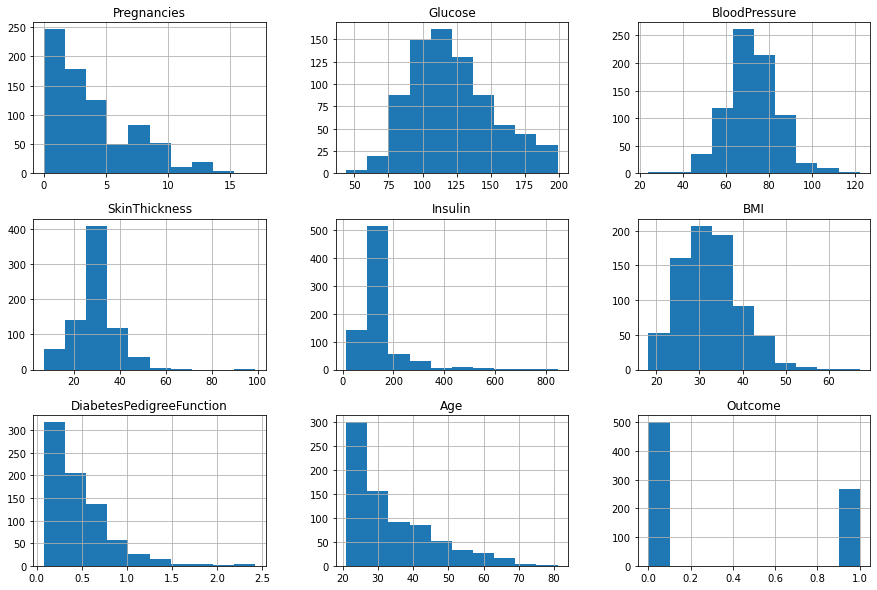

In [ ]:
# Verteilungsdiagramme von Prädiktoren

df.hist(bins=10,figsize=(15,10))

#### Heatmap

Eine Heatmap ist eine zweidimensionale Darstellung von Informationen mit Hilfe von Farben. Heatmaps können dem Benutzer helfen, einfache oder komplexe Informationen zu visualisieren. 

Wenn wir uns die Korrelationsmatrix ansehen, können wir die Hypothese aufstellen, dass Glukosespiegel, BMI und Alter für die Bestimmung, ob ein Patient Diabetes hat oder nicht, von entscheidender Bedeutung sind.


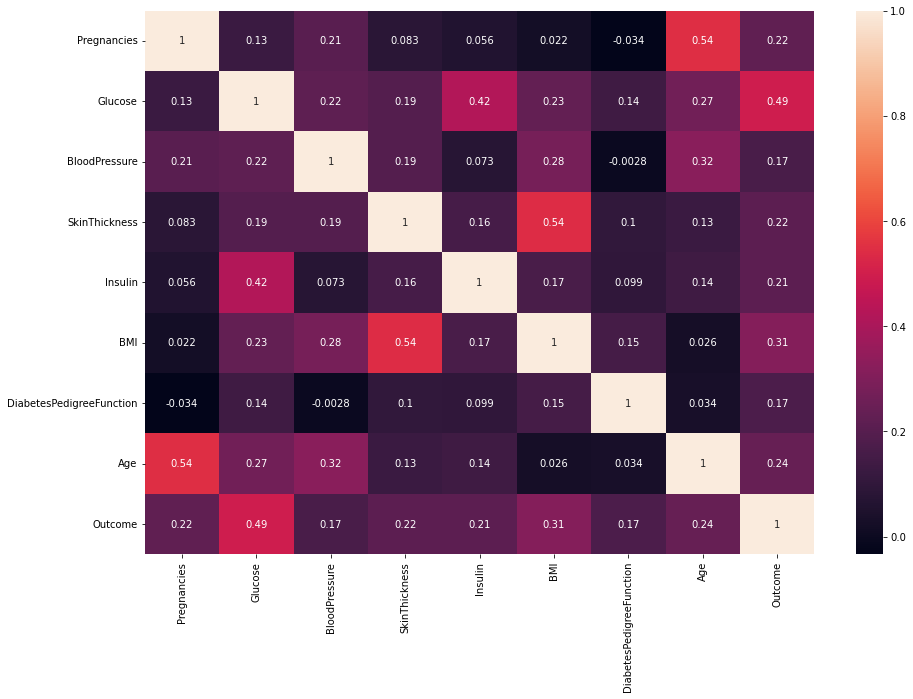

In [ ]:
plt.figure(figsize=(10,10)) # In dieser Zeile haben wir die Größe der Figur auf 12 x 10 gesetzt.
p=sns.heatmap(df.corr(),annot=True)
# Bibliothek der Seaborn hat eine sehr einfache Lösung für Erstellung des Heatmaps

Ein Paardiagramm (Pairplot) ermöglicht es uns, sowohl die Verteilung einzelner Variablen als auch Beziehungen zwischen zwei Variablen zu sehen. 

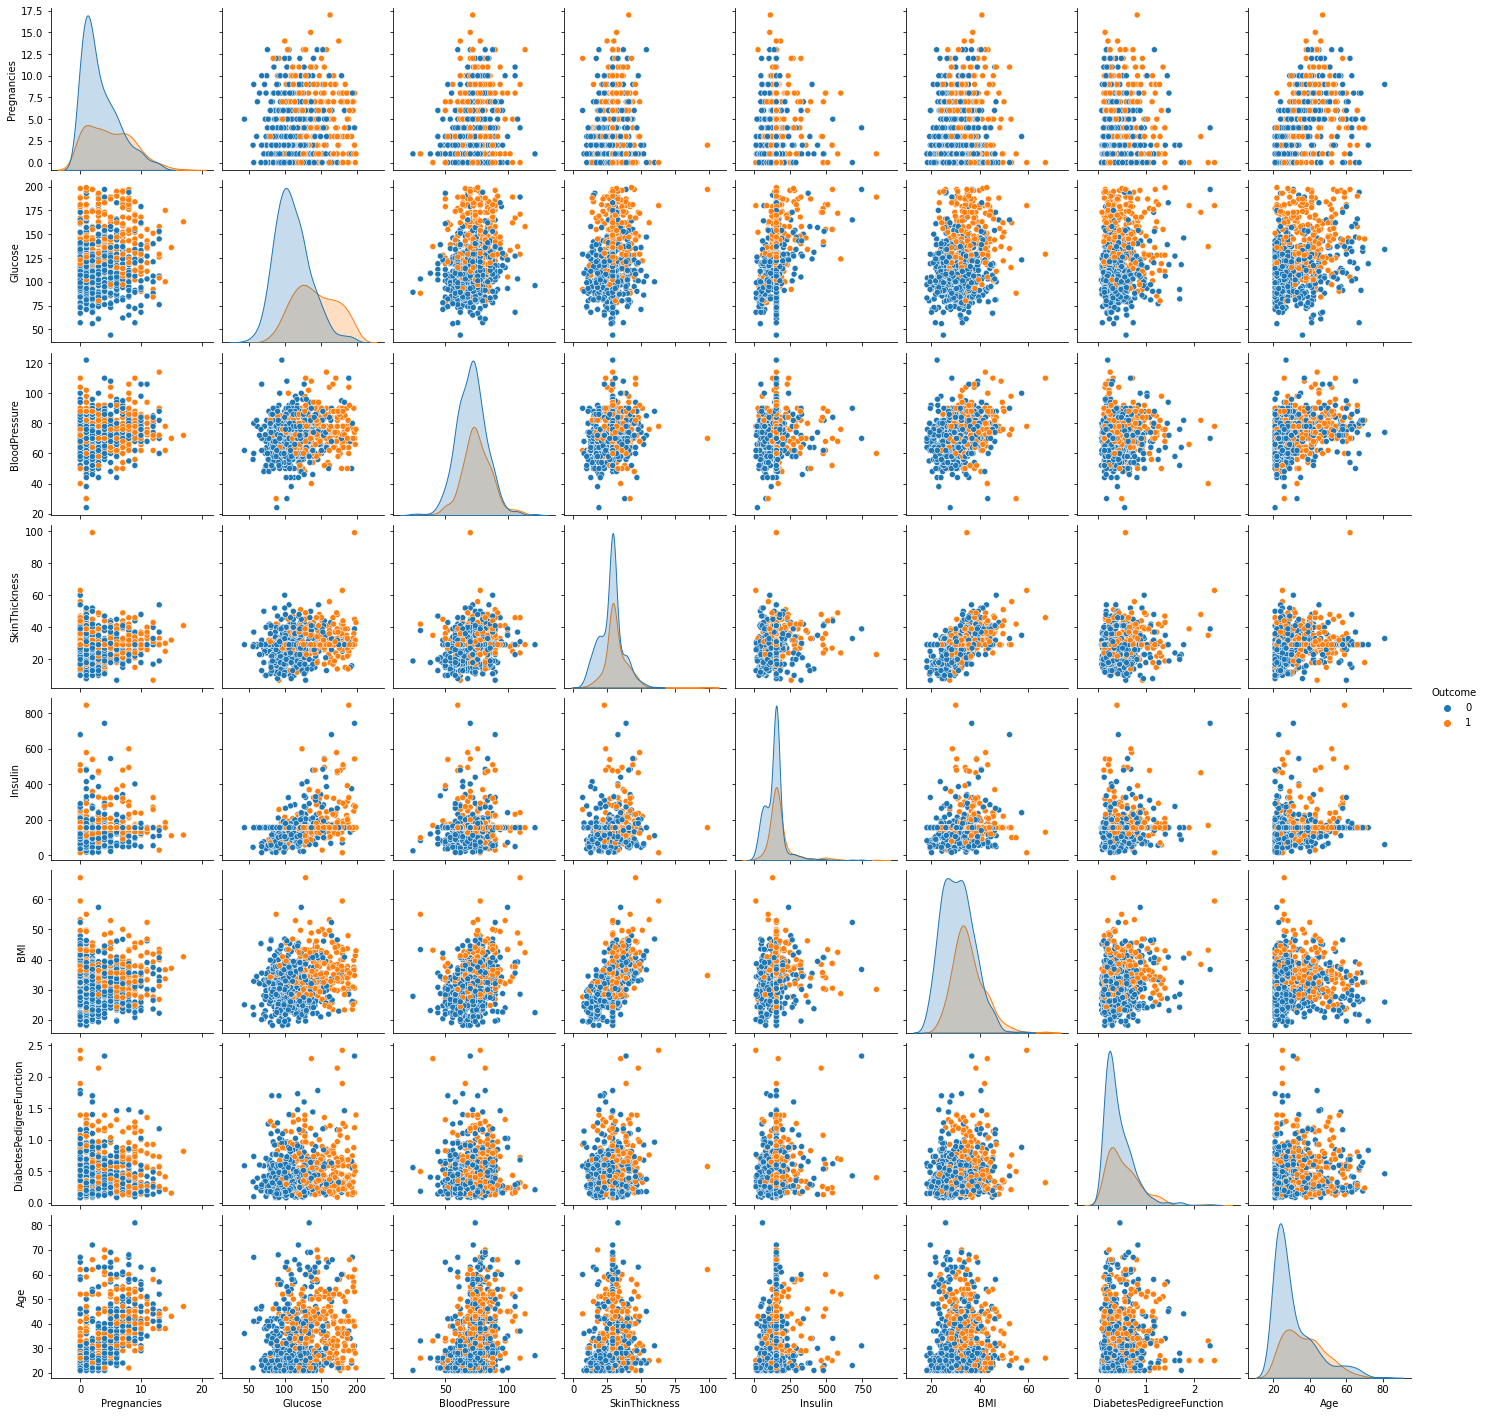

In [ ]:
sns.pairplot(data=df,hue='Outcome')

# Blau : 0
# Orange: 1

In [ ]:
X=df.drop(columns='Outcome')
# Die Funktion drop() wird verwendet, um bestimmte Beschriftungen aus Zeilen oder Spalten zu löschen

Y=df['Outcome']

Die Normalisierung erfolgt in der Datenbank, um Datenduplizierung zu vermeiden und die Datenkonsistenz (Genauigkeit) zu erhöhen.

In [ ]:
X= Normalize(X)

In [ ]:
# Ein kleiner Vorgeschmack auf diese normalisierte Daten sehen Sie folglich:

X.head()
# Die ersten 5 Zeilen des Datenrahmens wurden untergedrückt.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-7.024666e-15,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-7.024666e-15,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,5.661555e-15,-7.024666e-15,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


### <center> Aufteilung der verfügbaren Daten in 70 % Trainings- und 30 % Testdaten <center>

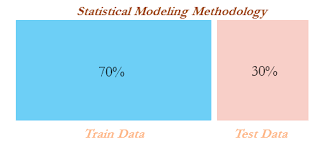

Die von uns verwendeten Daten sind in der Regel in Trainingsdaten und Testdaten aufgeteilt. Der Trainingssatz enthält eine bekannte Ausgabe und das Modell lernt mit diesen Daten, um später auf andere Daten verallgemeinert zu werden. Wir haben den Testdatensatz (oder Teilmenge), um die Vorhersage unseres Modells für diese Teilmenge zu testen.

In [ ]:
# Die Methode train_test_split() wird verwendet, um unsere Daten in Trainings- und Testsätze aufzuteilen. 
# Zuerst teilen wir unsere Daten in Features (X) und Labels (y) auf. 
# Der Datenrahmen ist aufgeteilt in X_train, X_test, y_train und y_test. 

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=5)

In [ ]:
X_train=X_train.join(Y_train)
# Die Sätze x_train und y_train werden verwendet, um das Modell zu trainieren und anzupassen.

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,sep='\n')

(537, 9)
(537,)
(231, 8)
(231,)


### Ermittlung des bestmöglichen Wertes für 'k', also des optimalen Wertes für die Anzahl der Nachbarn:
#### - Das Modell wird auf einem Zugdatensatz entwickelt und die Genauigkeit wird anhand der Testdaten berechnet.
#### - Der Wert von k, der die maximale Genauigkeit ergibt, wird als der beste angesehen 

In [ ]:
Acc=[]
for j in range(1,20):
    pred=[]
    for i in range(len(X_test)):
        pred.append([KnaechsteNachbarnAlgorithmus(X_train,X_test.iloc[i,:],j)])
    Acc= Acc+([Genauigkeit(Y_test,pred)])

#### Die Genauigkeit ist bei k=17 maximal.
Genauigkeit = Anzahl richtiger Vorhersagen Gesamtzahl der Vorhersagen

In [ ]:
Acc

[0.6666666666666666,
 0.6666666666666666,
 0.7402597402597403,
 0.7359307359307359,
 0.7359307359307359,
 0.7532467532467533,
 0.7229437229437229,
 0.7489177489177489,
 0.7272727272727273,
 0.7445887445887446,
 0.7445887445887446,
 0.7359307359307359,
 0.7445887445887446,
 0.7445887445887446,
 0.7402597402597403,
 0.7489177489177489,
 0.7575757575757576,
 0.7489177489177489,
 0.7489177489177489]

In [ ]:
pred=[]
for i in range(len(X_test)):
    pred.append(KnaechsteNachbarnAlgorithmus(X_train,X_test.iloc[i,:],Acc.index(max(Acc))+1))
    
X_test['Pred']= pred
X_test['Outcome']= Y_test

#### Das Modell hat eine Genauigkeit von 76 %

Die Accuracy-Punktzahl (Genauigkeit) liegt zwischen 0 und 1 und gilt als erfolgreich für Punkte, die sich 1 nähern.

In [ ]:
# Lassen Sie uns unsere Genauigkeitsprüfung durchführen;
from sklearn.metrics import classification_report

print(classification_report(X_test['Outcome'], X_test['Pred']))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       160
           1       0.59      0.70      0.64        71

    accuracy                           0.76       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.77      0.76      0.76       231



F1 score = (2* Precision * Recall)/(Precision + Recall)

Der F1-Score zeigt uns den harmonischen Mittelwert der Präzisions-und Präzisionswerte (recall).

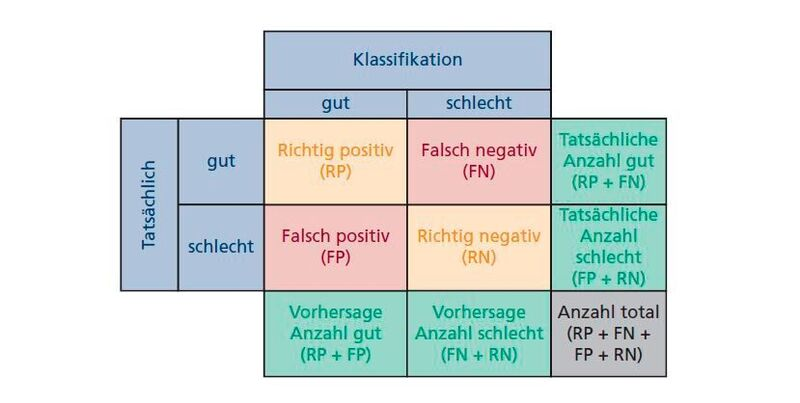

Eine Konfusionsmatrix ist eine Tabelle oder Matrix, die häufig verwendet wird, um die Leistung eines klassifikationsmodells auf einer Reihe von Testdaten zu beschreiben, für die tatsächliche Werte bekannt sind.

In [ ]:
pd.crosstab(X_test['Outcome'], X_test['Pred'], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,125,35,160
1,21,50,71
All,146,85,231


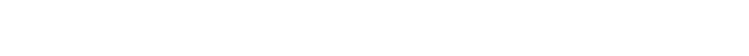

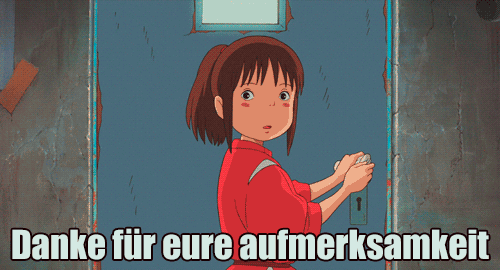 